In [6]:
import pandas as pd

# load datasets
df_train = pd.read_csv('../../preprocessing/datasets/ohe_25K_tracks_features_and_labels_for_training.csv')
df_test = pd.read_csv('../../preprocessing/datasets/ohe_25K_tracks_features_and_labels_for_test.csv')

# don't need to seperate them since we will use pyCaret
df_union = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
df_union.columns

Index(['Unnamed: 0', 'track_id', 'track_genre_top', 'track_title',
       'artist_name', 'set_split', 'set_subset', 'tempo', 'rms_harmonic_mean',
       'rms_harmonic_var', 'rms_percussive_mean', 'rms_percussive_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_rolloff_mean', 'spectral_rolloff_var', 'zero_crossings',
       'chroma_stft_0_mean', 'chroma_stft_1_mean', 'chroma_stft_2_mean',
       'chroma_stft_3_mean', 'chroma_stft_4_mean', 'chroma_stft_5_mean',
       'chroma_stft_6_mean', 'chroma_stft_7_mean', 'chroma_stft_8_mean',
       'chroma_stft_9_mean', 'chroma_stft_10_mean', 'chroma_stft_11_mean',
       'chroma_stft_0_var', 'chroma_stft_1_var', 'chroma_stft_2_var',
       'chroma_stft_3_var', 'chroma_stft_4_var', 'chroma_stft_5_var',
       'chroma_stft_6_var', 'chroma_stft_7_var', 'chroma_stft_8_var',
       'chroma_stft_9_var', 'chroma_stft_10_var', 'chroma_stft_11_var',
       'MFCC_1_mean', 'MFCC_2_mean', 'MFCC_3_mean', 'MFCC_4_mean',
       

In [8]:
# define features and label
features = [feature for feature in df_union.columns if feature not in ['Unnamed: 0', 'track_id', 'track_genre_top', 'artist_name', 'track_title', 'set_split', 'set_subset']]
label = 'track_genre_top'

In [9]:
df_union['track_genre_top'].value_counts()

Rock                   6387
Electronic             5680
Experimental           2025
Hip-Hop                1977
Folk                   1366
Instrumental           1218
Pop                    1064
International           916
Classical               557
Old-Time / Historic     459
Jazz                    345
Country                 160
Soul-RnB                136
Name: track_genre_top, dtype: int64

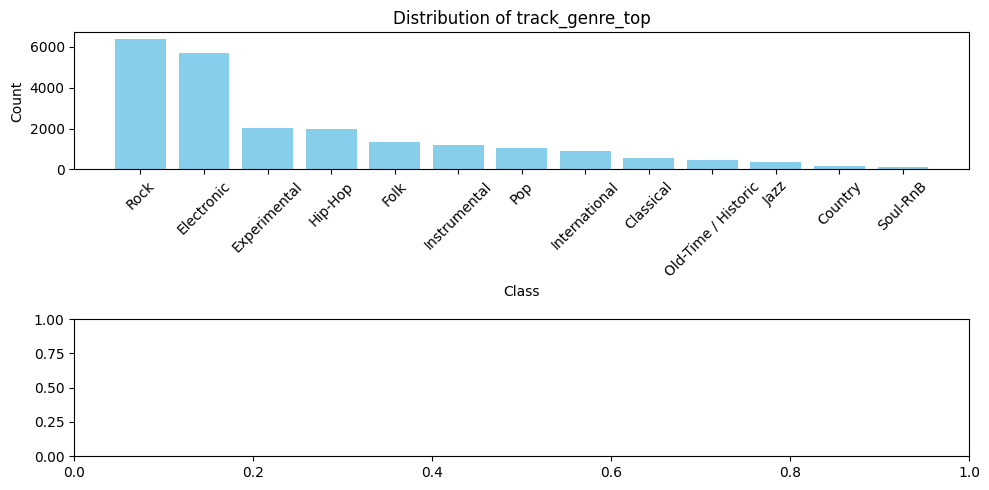

In [10]:

# to check if the dataset is balanced.
import matplotlib.pyplot as plt

def plot_value_counts(ax, column_name, df):
    value_counts = df[column_name].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_title(f'Distribution of {column_name}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

columns_to_plot = ['track_genre_top']

# Create a figure and a 5x1 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

for ax, column in zip(axes, columns_to_plot):
    plot_value_counts(ax, column, df_union)

plt.tight_layout()  # Adjust layout for better visibility
plt.show()

In [11]:
# Filter columns
used_columns = [label] + features

# Update merged_df with filtered columns and drop NaN rows
df_union = df_union[used_columns]

In [12]:
df_union

,track_genre_top,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,rms_percussive_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,...,key_C,key_C#,key_D,key_E,key_Eb,key_F,key_F#,key_G,scale_major,scale_minor
0,Hip-Hop,161.499023,0.060801,0.000606,0.102429,0.006546,2975.279504,9.329318e+05,6088.350559,2.180362e+06,...,1,0,0,0,0,0,0,0,0,1
1,Hip-Hop,86.132812,0.068484,0.001239,0.065604,0.002172,2758.702053,7.728350e+05,5681.876212,2.165383e+06,...,0,0,0,0,0,0,0,1,0,1
2,Hip-Hop,99.384014,0.079553,0.002230,0.085417,0.003846,2361.216888,7.092386e+05,5326.953068,2.415460e+06,...,0,1,0,0,0,0,0,0,0,1
3,Pop,112.347147,0.135624,0.000600,0.081036,0.003281,2319.325849,1.273302e+05,4256.393704,5.828485e+05,...,0,0,0,0,0,0,1,0,1,0
4,Hip-Hop,135.999178,0.088261,0.001123,0.094477,0.003812,2378.782197,8.972040e+05,4994.820480,3.289453e+06,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22285,Hip-Hop,129.199219,0.052490,0.000417,0.017636,0.001264,1024.151417,1.247926e+06,2228.936329,5.700566e+06,...,0,0,0,0,0,0,0,1,0,1
22286,Hip-Hop,99.384014,0.044508,0.000424,0.022598,0.000618,2250.980114,1.250727e+06,4496.251054,4.279378e+06,...,0,0,0,0,0,0,0,0,0,1
22287,Hip-Hop,129.199219,0.043216,0.002003,0.053547,0.009923,2426.486019,1.350575e+06,4994.368767,4.223903e+06,...,1,0,0,0,0,0,0,0,0,1
22288,Hip-Hop,129.199219,0.050994,0.001255,0.028848,0.002533,1622.445163,5.140070e+05,3138.568602,2.570738e+06,...,0,0,0,0,0,0,1,0,0,1


In [23]:
from pycaret.classification import *
exp_clf = setup(data = df_union, target = label, fix_imbalance = True, session_id=123, normalize=True) 

# For feature selection
# exp_clf = setup(data = df_union, target = label, session_id=123, feature_selection=True, n_features_to_select=0.75, normalize=True) 

,Description,Value
0,Session id,123
1,Target,track_genre_top
2,Target type,Multiclass
3,Target mapping,"Classical: 0, Country: 1, Electronic: 2, Experimental: 3, Folk: 4, Hip-Hop: 5, Instrumental: 6, International: 7, Jazz: 8, Old-Time / Historic: 9, Pop: 10, Rock: 11, Soul-RnB: 12"
4,Original data shape,"(22290, 89)"
5,Transformed data shape,"(64811, 89)"
6,Transformed train set shape,"(58123, 89)"
7,Transformed test set shape,"(6688, 89)"
8,Numeric features,88
9,Preprocess,True


In [13]:
compare_models()

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
model = create_model('lightgbm', fix_imbalance=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6054,0.8924,0.6054,0.5916,0.5958,0.5159,0.5164
1,0.6348,0.8986,0.6348,0.6174,0.6210,0.5486,0.5499
2,0.6160,0.8896,0.6160,0.6022,0.6053,0.5274,0.5283
3,0.6122,0.8967,0.6122,0.5930,0.5978,0.5215,0.5227
4,0.6103,0.8898,0.6103,0.5979,0.6000,0.5215,0.5223
5,0.6083,0.8914,0.6083,0.5895,0.5945,0.5167,0.5179
6,0.6244,0.8923,0.6244,0.6167,0.6116,0.5363,0.5376
7,0.6263,0.8905,0.6263,0.6109,0.6153,0.5403,0.5412
8,0.6103,0.8917,0.6103,0.5950,0.5986,0.5203,0.5212


In [25]:
print(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               fix_imbalance=True, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [26]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6188,0.8944,0.6188,0.6041,0.6064,0.5298,0.5309
1,0.6265,0.9012,0.6265,0.6042,0.6089,0.5370,0.5388
2,0.6141,0.8920,0.6141,0.5968,0.6001,0.5239,0.5250
3,0.6282,0.9038,0.6282,0.6097,0.6127,0.5393,0.5411
4,0.6186,0.8941,0.6186,0.5970,0.6021,0.5286,0.5301
5,0.6205,0.8948,0.6205,0.5985,0.6032,0.5295,0.5314
6,0.6288,0.8972,0.6288,0.6201,0.6149,0.5414,0.5431
7,0.6314,0.8915,0.6314,0.6117,0.6156,0.5439,0.5456
8,0.6147,0.8912,0.6147,0.5983,0.5979,0.5229,0.5246


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] Unknown parameter: fix_imbalance
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Unknown parameter: fix_imbalance
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046459 seconds.
You can set `force_col_wise

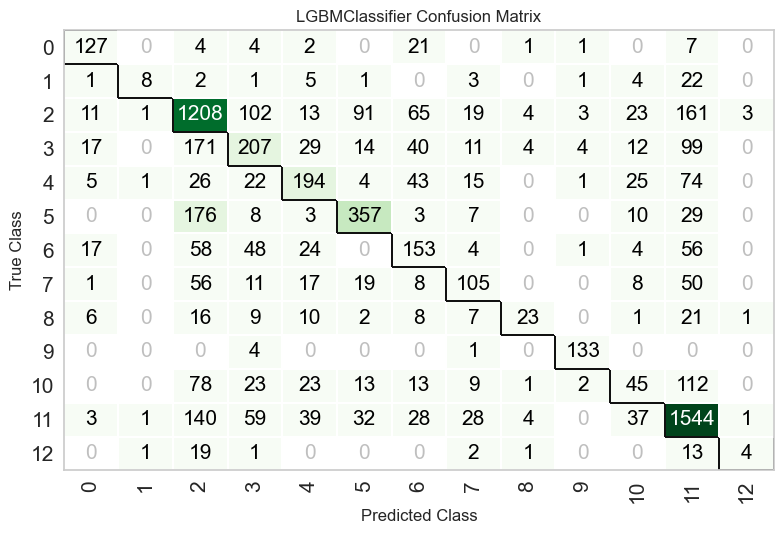

In [27]:
plot_model(tuned_model, plot = 'confusion_matrix')

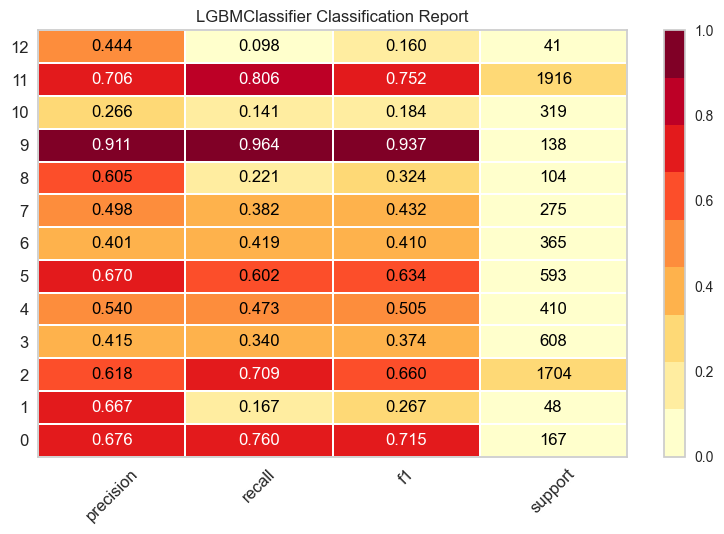

In [28]:
plot_model(tuned_model, plot = 'class_report')

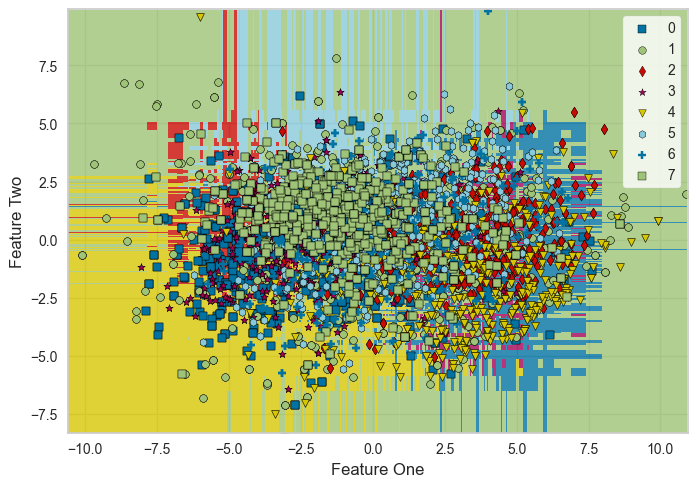

In [19]:
plot_model(tuned_model, plot = 'boundary')

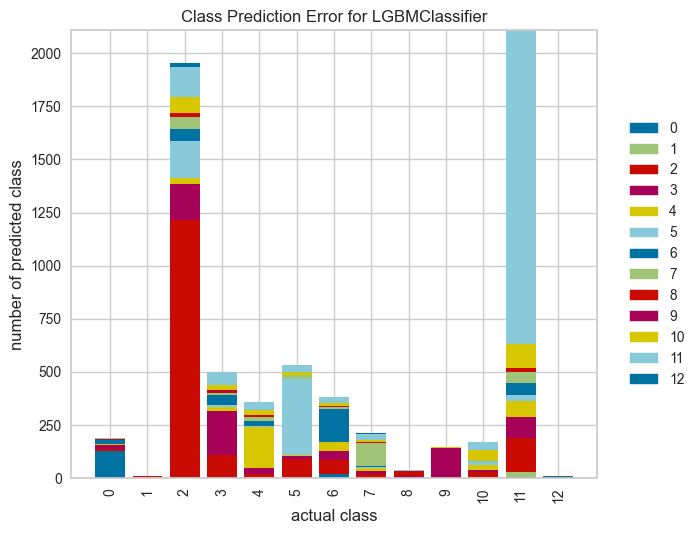

In [29]:
plot_model(tuned_model, plot = 'error')

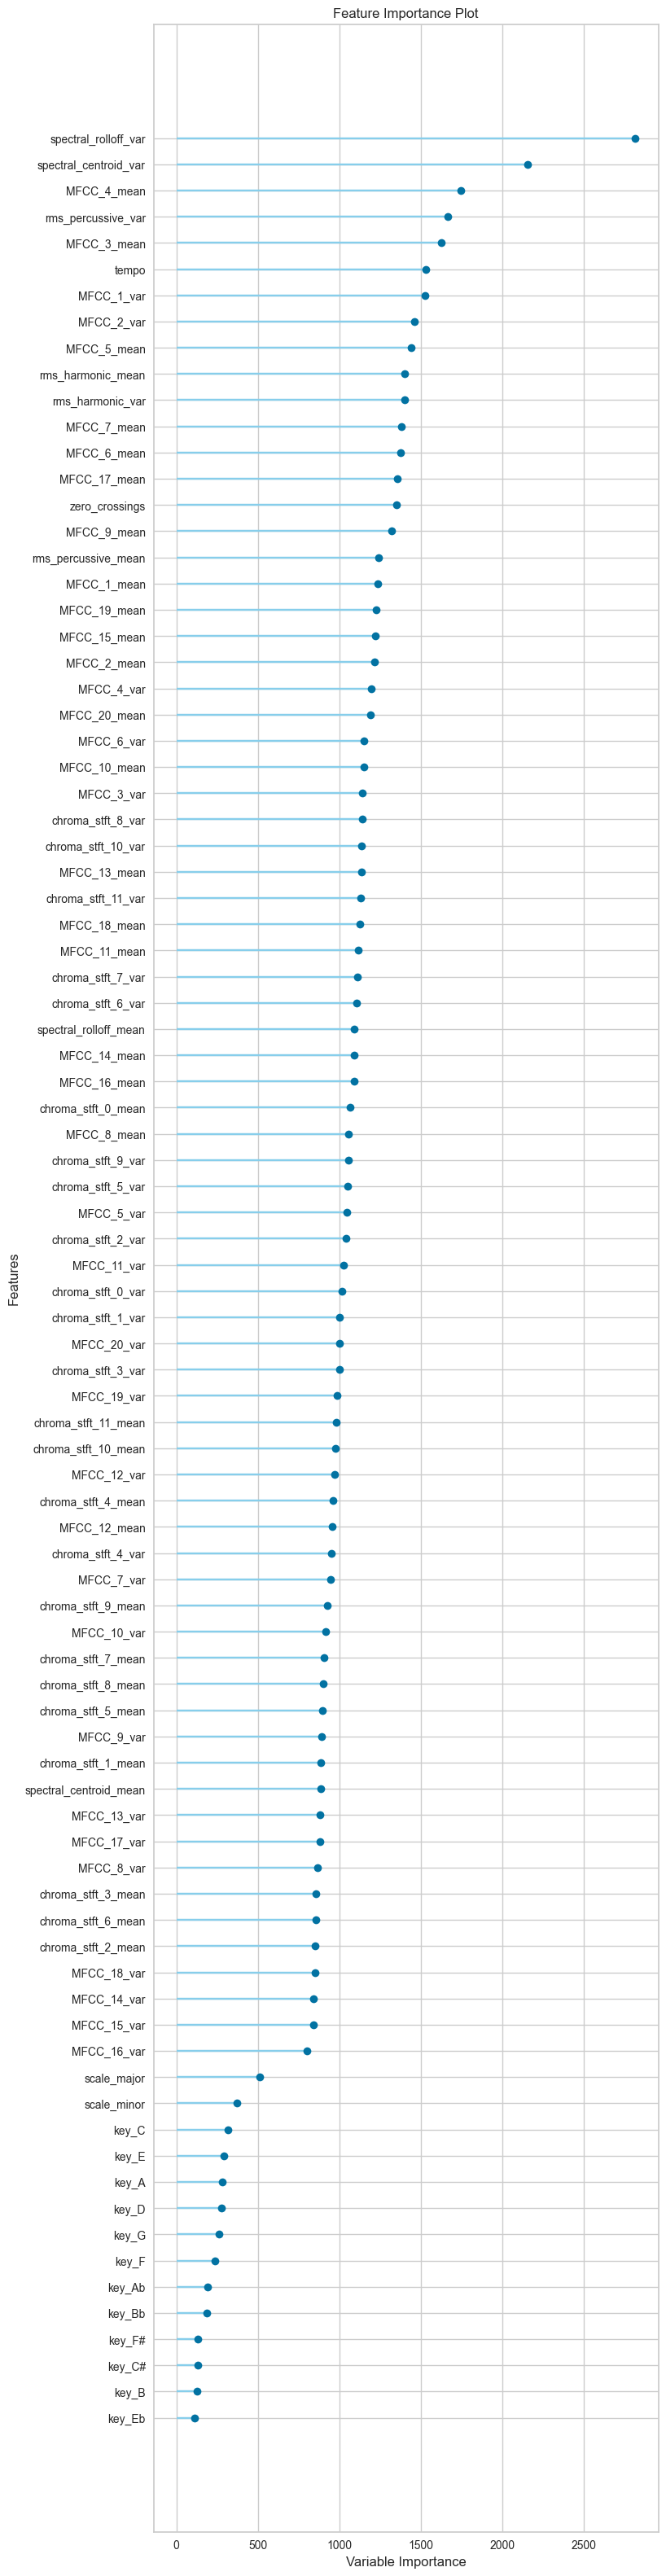

In [30]:
plot_model(tuned_model, plot = 'feature_all')

In [31]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6142,0.8912,0.6142,0.5975,0.5990,0.5225,0.5240


[LightGBM] [Warning] Unknown parameter: fix_imbalance
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] Unknown parameter: fix_imbalance
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


,tempo,rms_harmonic_mean,rms_harmonic_var,rms_percussive_mean,rms_percussive_var,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,zero_crossings,...,key_E,key_Eb,key_F,key_F#,key_G,scale_major,scale_minor,track_genre_top,prediction_label,prediction_score
10760,117.453835,0.199252,0.005006,0.058051,0.000840,1083.682129,3.786936e+04,1796.598511,1.633586e+05,29367.0,...,0,0,1,0,0,1,0,3,Experimental,0.8859
736,112.347145,0.198313,0.001524,0.078856,0.001542,1855.516357,6.100874e+05,3894.549072,3.530067e+06,39373.0,...,0,1,0,0,0,1,0,5,Electronic,0.7785
510,123.046875,0.100240,0.000555,0.043663,0.000393,1474.578247,2.412989e+05,3164.263428,1.614942e+06,36807.0,...,0,0,0,0,0,0,1,7,International,0.3516
18662,117.453835,0.111582,0.003377,0.064358,0.009310,1394.997803,9.261996e+05,2632.855225,4.594148e+06,40387.0,...,0,0,0,0,0,0,1,2,Electronic,0.8453
19601,117.453835,0.127346,0.001295,0.022364,0.000193,645.646973,4.117902e+04,1058.145996,1.784503e+05,17683.0,...,0,0,0,0,0,1,0,6,Instrumental,0.8017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,92.285156,0.124453,0.004602,0.149461,0.018818,2344.496582,1.033251e+06,4913.875488,3.706484e+06,69937.0,...,0,0,0,0,0,0,1,5,Hip-Hop,0.9872
15166,112.347145,0.106330,0.009434,0.065059,0.003371,2094.944580,9.333007e+05,3710.432861,1.777671e+06,88785.0,...,0,0,1,0,0,0,1,3,Electronic,0.4180
11182,135.999176,0.187927,0.002981,0.082760,0.001656,1625.919434,7.203018e+05,3607.477783,4.928161e+06,32569.0,...,0,0,0,0,0,0,1,3,Electronic,0.7076
13635,112.347145,0.106860,0.002395,0.081094,0.002329,2274.426270,1.308114e+06,4677.368164,3.714728e+06,68383.0,...,0,1,0,0,0,0,1,5,Hip-Hop,0.6542


In [34]:
dummy_1 = create_model('dummy',  strategy='most_frequent')
dummy_2 = create_model('dummy', strategy='stratified')
dummy_3 = create_model('dummy', strategy='uniform')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
1,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
2,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
3,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
4,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
5,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
6,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
7,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000
8,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0801,0.5019,0.0801,0.1864,0.0999,0.0025,0.0026
1,0.0839,0.5036,0.0839,0.1839,0.1015,0.0066,0.0070
2,0.0756,0.4984,0.0756,0.1672,0.0934,-0.0024,-0.0025
3,0.0679,0.4936,0.0679,0.1481,0.0821,-0.0107,-0.0113
4,0.0795,0.5007,0.0795,0.1761,0.0988,0.0018,0.0019
5,0.0827,0.5028,0.0827,0.1806,0.1012,0.0053,0.0056
6,0.0744,0.4973,0.0744,0.1608,0.0910,-0.0038,-0.0040
7,0.0769,0.4995,0.0769,0.1739,0.0963,-0.0010,-0.0011
8,0.0782,0.5000,0.0782,0.1733,0.0963,0.0004,0.0004


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0756,0.5000,0.0756,0.1828,0.0951,-0.0017,-0.0018
1,0.0692,0.5000,0.0692,0.1559,0.0828,-0.0087,-0.0092
2,0.0686,0.5000,0.0686,0.1510,0.0828,-0.0093,-0.0099
3,0.0769,0.5000,0.0769,0.1673,0.0908,-0.0003,-0.0003
4,0.0769,0.5000,0.0769,0.1743,0.0940,-0.0003,-0.0003
5,0.0865,0.5000,0.0865,0.1952,0.1056,0.0101,0.0107
6,0.0808,0.5000,0.0808,0.1723,0.0947,0.0039,0.0041
7,0.0795,0.5000,0.0795,0.1810,0.0980,0.0025,0.0026
8,0.0801,0.5000,0.0801,0.1867,0.0988,0.0032,0.0034


In [35]:
best_model = compare_models(include=[tuned_model, dummy_1, dummy_2, dummy_3])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.6236,0.8960,0.6236,0.6052,0.6079,0.5344,0.5360,16.2110
2,Dummy Classifier,0.0779,0.4999,0.0779,0.1728,0.0958,0.0001,0.0001,0.0550
3,Dummy Classifier,0.0776,0.5000,0.0776,0.1763,0.0946,0.0005,0.0005,0.0570
1,Dummy Classifier,0.0250,0.5000,0.0250,0.0006,0.0012,0.0000,0.0000,0.0650


In [36]:
final_model = finalize_model(tuned_model)
save_model(final_model, 'lightgbm_model_25K_88F_231124')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tempo', 'rms_harmonic_mean',
                                              'rms_harmonic_var',
                                              'rms_percussive_mean',
                                              'rms_percussive_var',
                                              'spectral_centroid_mean',
                                              'spectral_centroid_var',
                                              '...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 fix_imbalance=True, importance_type='split',
                                 learning_rate=0.1, 